In [7]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns




In [4]:
path = kagglehub.dataset_download("unsdsn/world-happiness")

# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "creditcard.csv"

# Load the latest version
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "mlg-ulb/creditcardfraud",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())


100%|██████████| 36.8k/36.8k [00:00<00:00, 3.90MB/s]

Extracting files...


Using Colab cache for faster access to the 'creditcardfraud' dataset.
First 5 records:    Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ...

In [10]:
print("\n--- EDA 1: Missing Values ---")
print(f"Max missing values in any column: {df.isnull().sum().max()}")




--- EDA 1: Missing Values ---
Max missing values in any column: 0


Reason: Before building any model, it’s essential to check for missing or null values because they can lead to biased or incomplete analysis.

Purpose: Ensures data quality and reliability — confirming the dataset (credit card fraud data) has no missing entries that might distort results.


--- EDA 2: Class Imbalance ---
Class
0    284315
1       492
Name: count, dtype: int64
Fraudulent percentage: 0.1727%


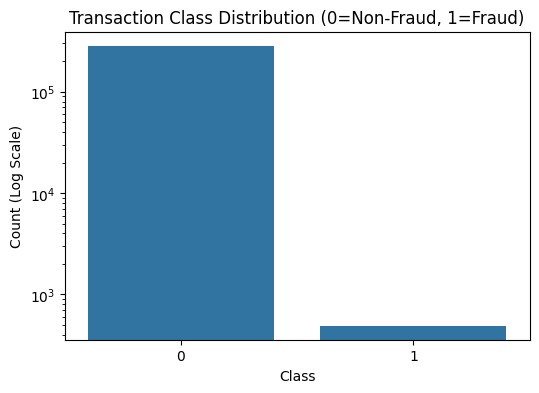

In [11]:

# EDA #2: Analyze Class Imbalance (Crucial for Fraud Detection)
print("\n--- EDA 2: Class Imbalance ---")
class_counts = df['Class'].value_counts()
print(class_counts)
print(f"Fraudulent percentage: {class_counts[1]/len(df) * 100:.4f}%")

# Visualize the Imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Transaction Class Distribution (0=Non-Fraud, 1=Fraud)')
plt.ylabel('Count (Log Scale)')
plt.yscale('log')
plt.show()

Reason: In fraud detection datasets, there’s usually a huge imbalance — very few fraudulent transactions compared to normal ones.

Purpose: This step helps determine how skewed the data is, which is critical for deciding model strategies (like resampling, using balanced metrics such as F1-score, or applying anomaly detection).


--- EDA 3: Transaction Amount Comparison ---
Fraudulent Amount Stats:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Non-Fraudulent Amount Stats:
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


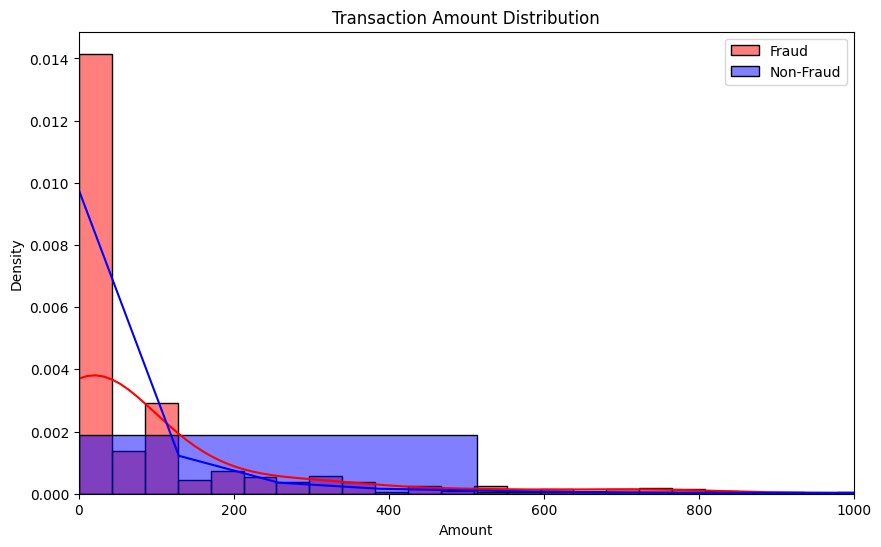

In [8]:
print("\n--- EDA 3: Transaction Amount Comparison ---")
f_df = df[df['Class'] == 1]['Amount']
nf_df = df[df['Class'] == 0]['Amount']

print("Fraudulent Amount Stats:")
print(f_df.describe())
print("\nNon-Fraudulent Amount Stats:")
print(nf_df.describe())

# Visualize the distributions
plt.figure(figsize=(10, 6))
sns.histplot(f_df, bins=50, color='red', label='Fraud', stat='density', kde=True)
sns.histplot(nf_df, bins=50, color='blue', alpha=0.5, label='Non-Fraud', stat='density', kde=True)
plt.title('Transaction Amount Distribution')
plt.xlim(0, 1000)
plt.legend()
plt.show()

Reason: A count plot makes the class imbalance visually clear and intuitive.

Purpose: The log scale helps visualize differences even when one class (fraud) is much smaller, giving better interpretability of the imbalance.


--- EDA 4: Transaction Time Analysis ---


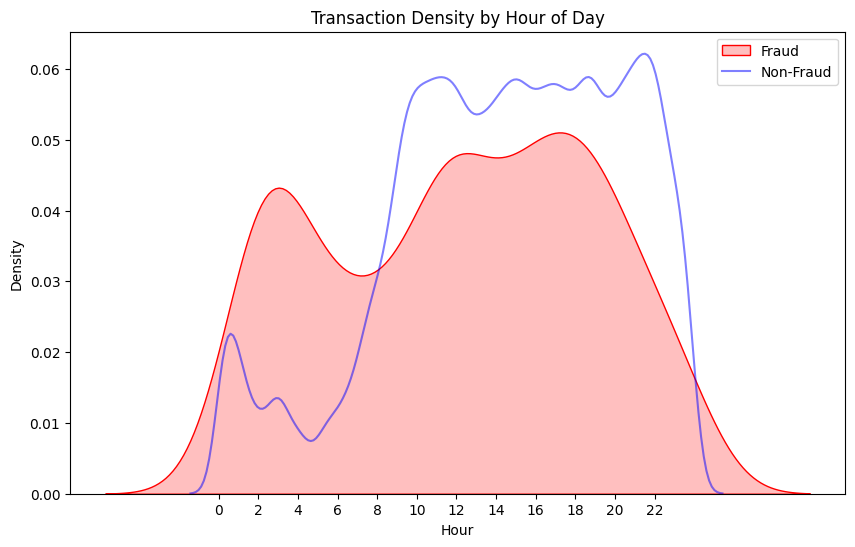

In [12]:
# ku myout EDA

print("\n--- EDA 4: Transaction Time Analysis ---")

df['Hour'] = (df['Time'] / 3600) % 24

plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Class'] == 1]['Hour'], label='Fraud', color='red', fill=True)
sns.kdeplot(df[df['Class'] == 0]['Hour'], label='Non-Fraud', color='blue', alpha=0.5)
plt.xticks(np.arange(0, 24, 2))
plt.title('Transaction Density by Hour of Day')
plt.legend()
plt.show()


Reason: Always an initial EDA step to confirm that data was correctly loaded and to understand its structure (columns, types, and a few sample rows).

Purpose: Helps identify potential preprocessing needs (e.g., numerical scaling, categorical encoding, etc.).

In [13]:


# EDA #5: Correlation with the Target
print("\n--- EDA 5: Correlation with Target 'Class' ---")

corr_matrix = df.drop(columns=['Hour']).corr()
class_corr = corr_matrix['Class'].sort_values(ascending=False)

print("Top 5 Positive and Negative Correlations with Fraud (Class):")
# Show top 3 positive (except Class itself) and top 3 negative correlations
print(class_corr.head(4))
print(class_corr.tail(3))


--- EDA 5: Correlation with Target 'Class' ---
Top 5 Positive and Negative Correlations with Fraud (Class):
Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
Name: Class, dtype: float64
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64


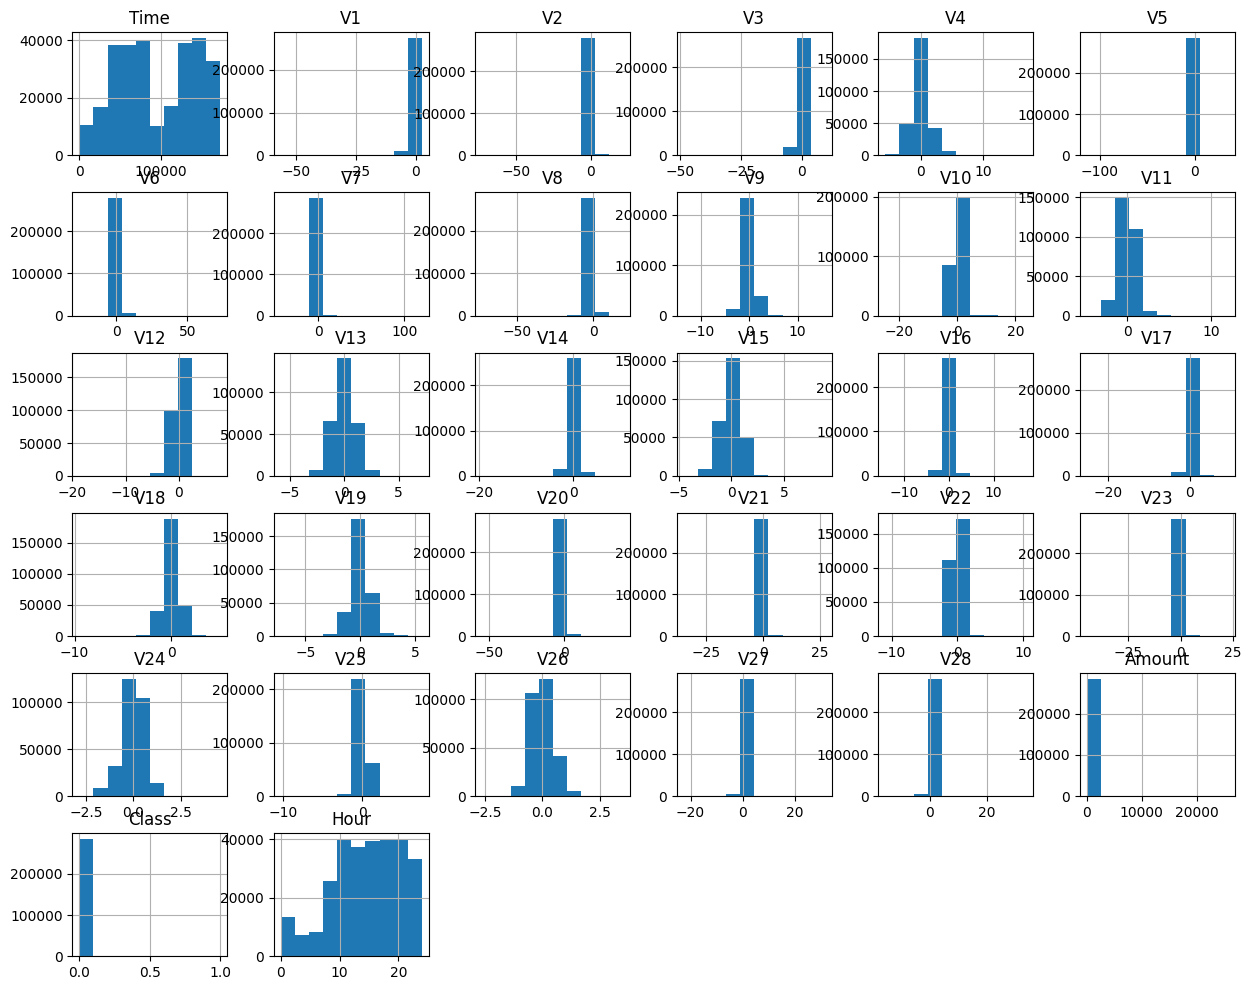

In [14]:
# Check the distribution of all the features
df.hist(figsize=(15,12))
plt.title("Features Distribution")
plt.show()


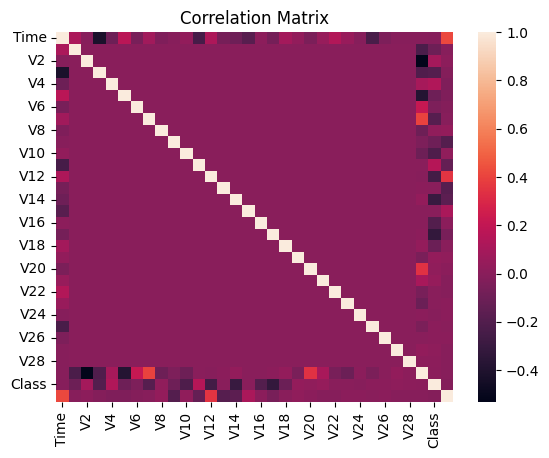

In [15]:
# Calculate and visualize correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False)
plt.title('Correlation Matrix')
plt.show()